In [3]:
import numpy as np
import matplotlib.pyplot as plt

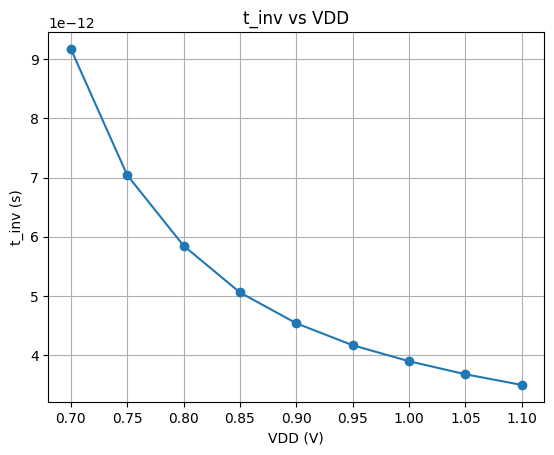

In [4]:
# Obtained using Fan-Out 20

vdd = np.linspace(0.7, 1.1, 9)
t_inv = np.array([9.17, 7.04, 5.85, 5.06, 4.54, 4.17, 3.90, 3.68, 3.50])
t_inv = t_inv * 10**-12
plt.plot(vdd, t_inv, marker='o')
plt.title("t_inv vs VDD")
plt.xlabel("VDD (V)")
plt.ylabel("t_inv (s)")
plt.grid(True)

# Logical Effort Hand Calculation
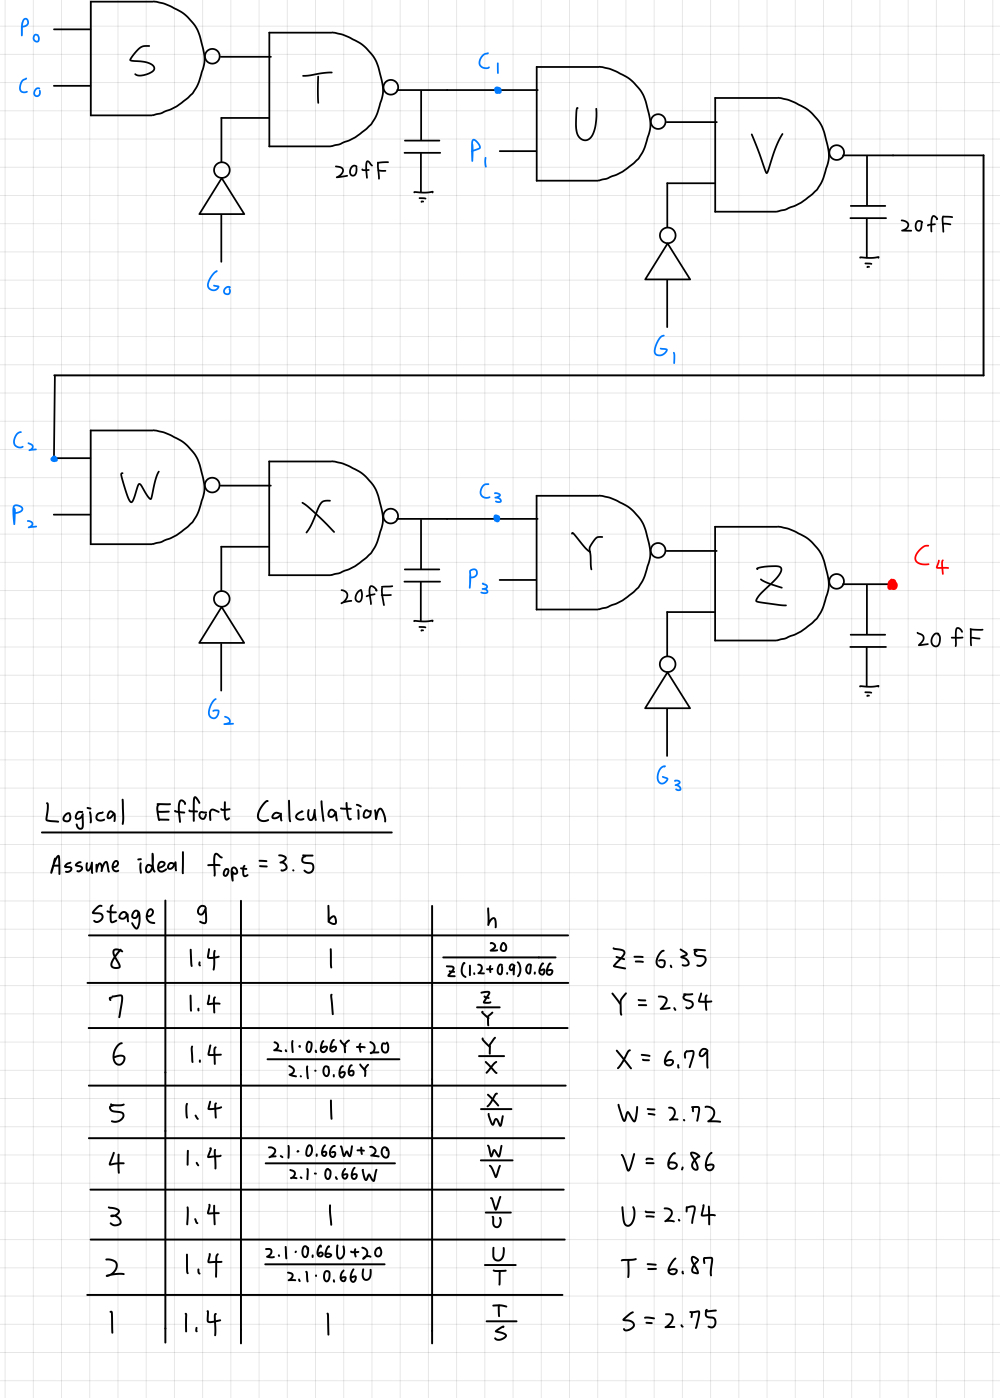

Since we sized the gates so that each stage has f_opt = 3.5, the normalized delay of the entire chain is d = 3.5x8 + 2.18x8 = 45.44

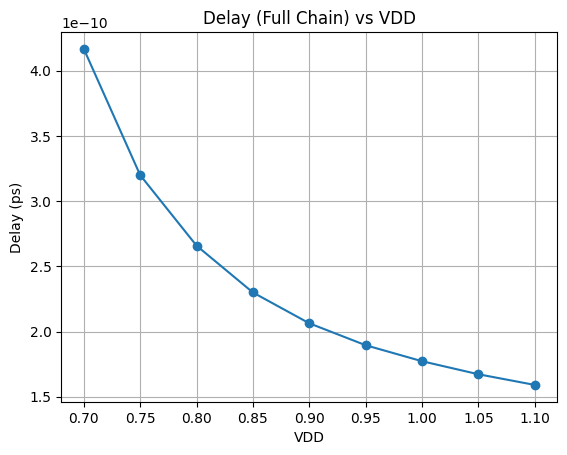

In [5]:
# 45.44 is normalized delay obtained from hand calculations
full_chain_delay = t_inv * 45.44
plt.plot(vdd, full_chain_delay, marker = 'o')
plt.title("Delay (Full Chain) vs VDD")
plt.xlabel("VDD")
plt.ylabel("Delay (ps)")
plt.grid(True)

# Hand Calculation of Total Energy vs VDD
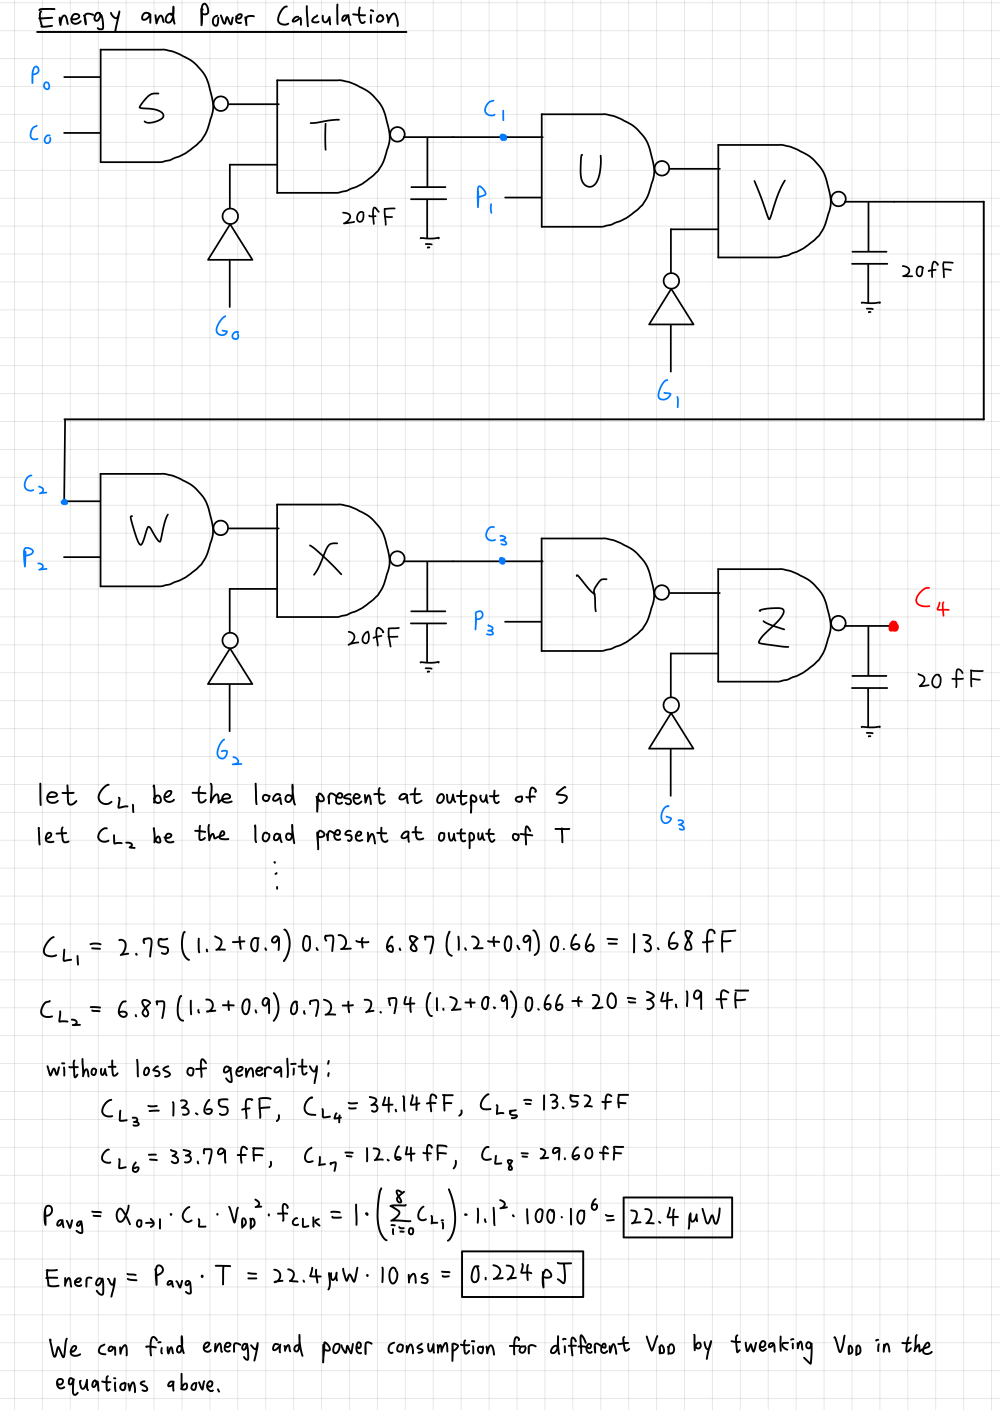

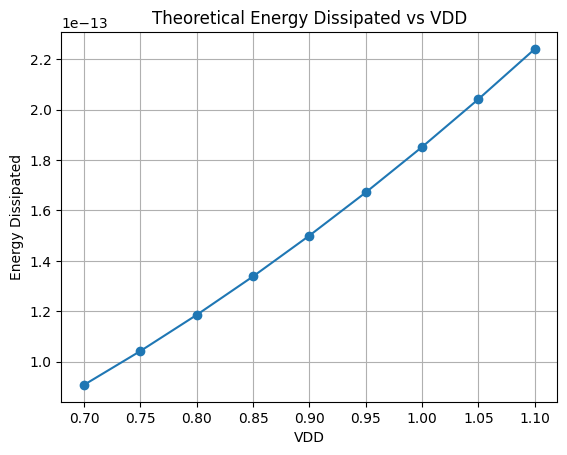

In [11]:
c_load = 185.21*10**-15
alpha = 1 # ask me if you don't get why it's 1
energy = alpha * c_load * vdd**2
plt.plot(vdd, energy, marker = 'o')
plt.title("Theoretical Energy Dissipated vs VDD")
plt.xlabel("VDD")
plt.ylabel("Energy Dissipated")
plt.grid(True)

# Theoretical EDP vs VDD Graph

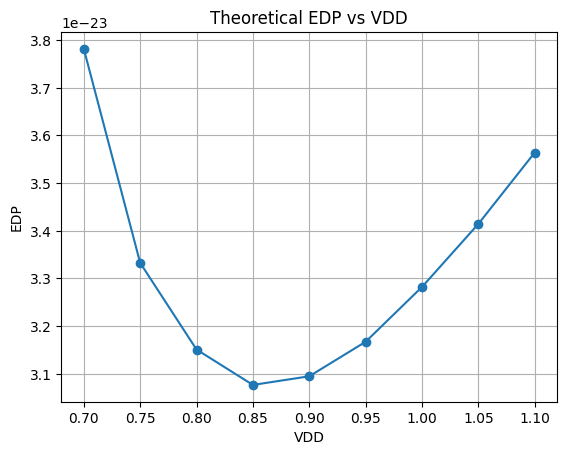

In [12]:
# EDP = Power (depending on VDD) * 10 ns * Delay_Full_Chain (depending on VDD)
edp = energy * full_chain_delay
plt.plot(vdd, edp, marker = 'o')
plt.title("Theoretical EDP vs VDD")
plt.xlabel("VDD")
plt.ylabel("EDP")
plt.grid(True)

# Another Method to Obtain Optimal VDD for Lowest EDP (method in final project milestone 1)
Note: For the method above to get optimal VDD, I followed instructions in the Final Project.pdf under section "EDP Optimization Flow"

I basically think they want us to get an optimal VDD purely based on hand calculation (above), and confirm with simulation results (what I'm about to do below). Instructions for these are in EDP optimization.pdf.

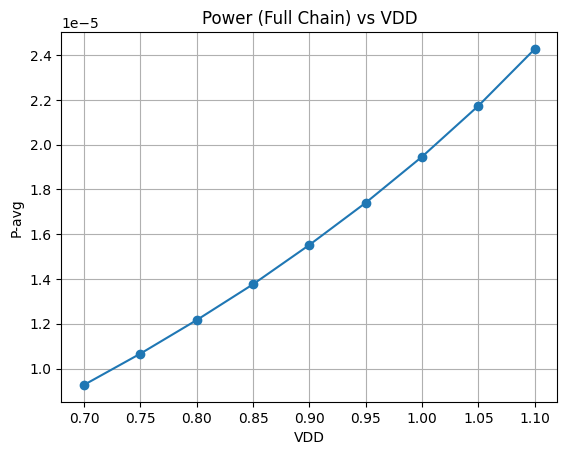

In [6]:
avg_current_fo1 = np.array([136.7, 146.8, 157, 167.2, 178.1, 189.2, 201, 213.8, 227.9])
avg_current_fo1 = avg_current_fo1 * 10**-9
avg_power_fo1 = avg_current_fo1 * vdd
avg_power_full = (22.07*10**-6*1.1)/(227.9*10**-9*1.1)*avg_power_fo1  # using formula from Final Project milestone 1.pdf
plt.plot(vdd, avg_power_full, marker = 'o')
plt.title("Power (Full Chain) vs VDD")
plt.xlabel("VDD")
plt.ylabel("P-avg")
plt.grid(True)

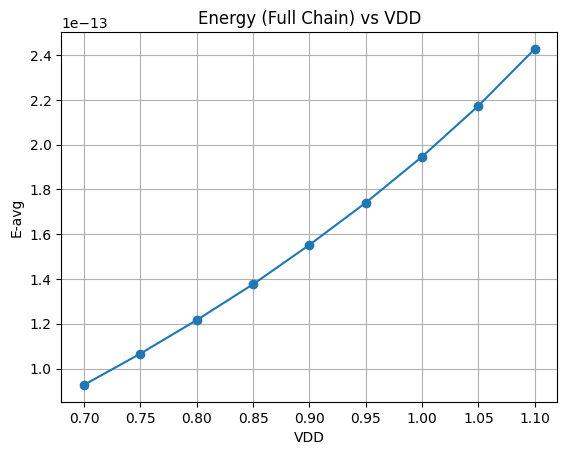

In [7]:
energy_full = avg_power_full * 10*10**-9
plt.plot(vdd, energy_full, marker = 'o')
plt.title("Energy (Full Chain) vs VDD")
plt.xlabel("VDD")
plt.ylabel("E-avg")
plt.grid(True)

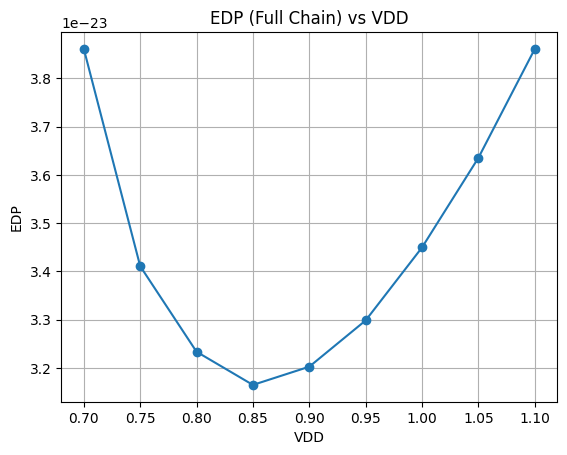

In [8]:
edp = energy_full * full_chain_delay
plt.plot(vdd, edp, marker = 'o')
plt.title("EDP (Full Chain) vs VDD")
plt.xlabel("VDD")
plt.ylabel("EDP")
plt.grid(True)

# Choose Optimal VDD for Minimum EDP
For both hand calculations and simulation results, VDD = 0.85V yielded the lowest EDP.

Now we test VDD = 0.85V and VDD = 1.1V on the full circuit and calculate the EDP and compare.

For VDD = 1.1V:
*   propagation delay = (173.2+174.7)/2 = 173.95 ps
*   average current = 22.07 uA
*   EDP = energy x propagation delay = average current x VDD x 10ns x propagation delay = 22.07 x 10^-6 x 1.1 x 10 x 10^-9 x 173.95 x 10^-12 = **4.22e-23**

For VDD = 0.85V:
*   propagation delay = (325.4+347.3)/2 = 336.35 ps
*   average current = 16.75 uA
*   EDP = energy x propagation delay = average current x VDD x 10ns x propagation delay = 16.75 x 10^-6 x 0.85 x 10 x 10^-9 x 336.35 x 10^-12 = **4.79e-23**


# That is very weird. I am going to sweep VDD for entire circuit and obtain EDP vs VDD through simulation.

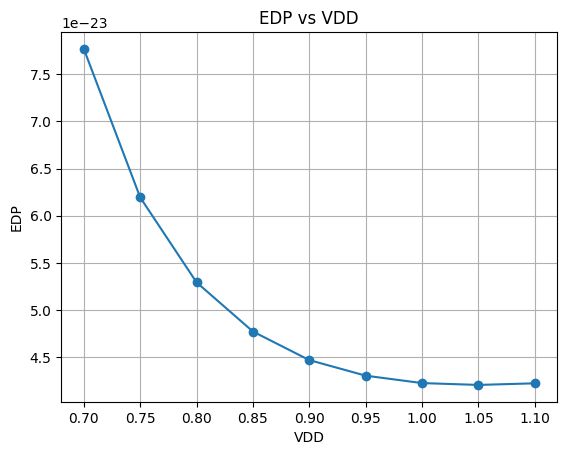

In [14]:
tpLH = np.array([807.2, 552.6, 410.5, 325.7, 271.2, 234.2, 207.8, 188.3, 173.3])
tpHL = np.array([830.8, 577.1, 432.8, 344.1, 286, 245.6, 215.9, 192.9, 174.5])
tp = (tpLH + tpHL)/2
tp = tp * 10**-12

avg_current = np.array([13.55, 14.62, 15.69, 16.76, 17.82, 18.88, 19.94, 21.01, 22.07])
avg_current = avg_current * 10**-6

avg_power = avg_current * vdd
avg_energy = avg_power * 10 * 10**-9
EDP = avg_energy * tp
plt.plot(vdd, EDP, marker = 'o')
plt.title("EDP vs VDD")
plt.xlabel("VDD")
plt.ylabel("EDP")
plt.grid(True)

## WHY IS THIS HAPPENING?